In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

# 활성화 함수

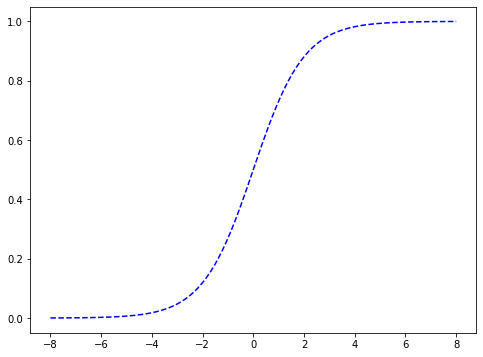

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, sigm_func(x), 'b--')

In [ ]:
np.e

2.718281828459045

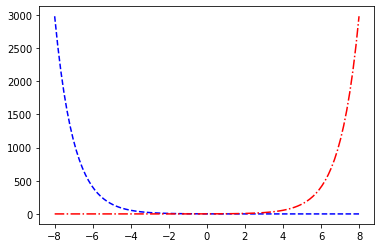

In [ ]:
plt.figure(figsize=(6, 4)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, np.exp(-x), 'b--')
_ = plt.plot(x, np.exp(x), 'r-.')

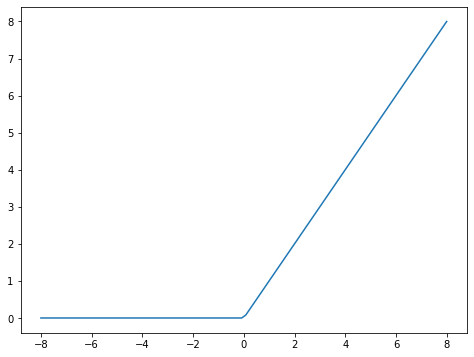

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

# ReLU 함수 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, relu_func(x))

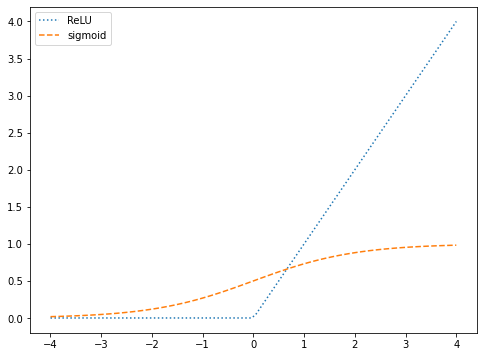

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-4, 4, 100)
y = np.linspace(-0.2, 2, 100)

plt.plot(x, relu_func(x), linestyle=':', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

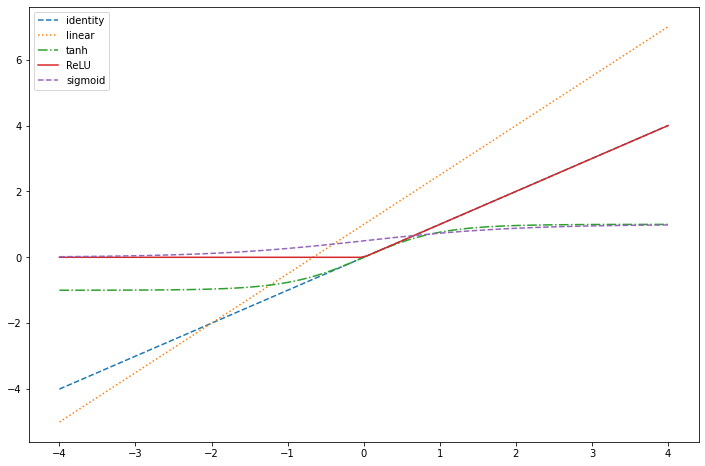

In [ ]:
import numpy as np
import matplotlib.pylab as plt
 
def identity_func(x): # 항등함수
    return x
  
def linear_func(x): # 1차함수
    return 1.5 * x + 1 # a기울기(1.5), Y절편b(1) 조정가능

def tanh_func(x): # TanH 함수
    return np.tanh(x)

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(12, 8)) 
x = np.linspace(-4, 4, 100)

plt.plot(x, identity_func(x), linestyle='--', label="identity")
plt.plot(x, linear_func(x), linestyle=':', label="linear")
plt.plot(x, tanh_func(x), linestyle='-.', label="tanh")
plt.plot(x, relu_func(x), linestyle='-', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')


# 케라스로 구현하는 선형 회귀

In [ ]:
import tensorflow as tf

# ① 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# ② 모델 구성(생성)
model = tf.keras.models.Sequential([
    #                   출력, 입력=(*, 1)           그대로 출력
    tf.keras.layers.Dense(1, input_shape=(1, ), activation='linear')
    #Dense(1, input_dim=1)
])

In [ ]:
# ③ 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력 정보를 지정
# Mean Absolute Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse',
              metrics=['mae', 'mse'])

In [ ]:
# 모델을 표시(시각화)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ④ 생성된 모델로 훈련 데이터 학습
# 훈련과정 정보를 history 객체에 저장 
history = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 78.6358 - mae: 8.0950 - mse: 78.6358
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 54.6126 - mae: 6.7189 - mse: 54.6126
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 37.9431 - mae: 5.5726 - mse: 37.9431
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 26.3761 - mae: 4.6179 - mse: 26.3761
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 18.3498 - mae: 3.8226 - mse: 18.3498
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 12.7802 - mae: 3.1603 - mse: 12.7802
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 8.9153 - mae: 2.6086 - mse: 8.9153
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 6.2333 - mae: 2.1492 - mse: 6.2333
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 4.3720 - mae: 1.7665 - mse: 4.3720
Epoch 10/500
1/1 [================

In [ ]:
# ⑤ 테스트 데이터로 성능 평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('손실:', model.evaluate(x_test, y_test))

1/1 [==============================] - 0s 2ms/step - loss: 0.0085 - mae: 0.0825 - mse: 0.0085
손실: [0.008547702804207802, 0.08247208595275879, 0.008547702804207802]


In [ ]:
# x = [3.5, 5, 5.5, 6]의 예측 
print(model.predict([3.5, 5, 5.5, 6]))

pred = model.predict([3.5, 5, 5.5, 6])
# 예측 값만 1차원으로 
print(pred.flatten())
print(pred.squeeze())

[[ 6.9580235]
 [ 9.845562 ]
 [10.808075 ]
 [11.770587 ]]
[ 6.9580235  9.845562  10.808075  11.770587 ]
[ 6.9580235  9.845562  10.808075  11.770587 ]


[ 6.9914975  9.968718  10.961124  11.953531 ]
[ 6.9914975  9.968718  10.961124  11.953531 ]


## 손실과 예측 시각화

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'mse'])

Text(0, 0.5, 'loss')

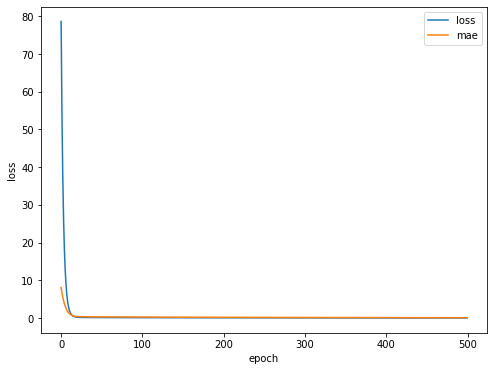

In [ ]:
import matplotlib.pylab as plt

# 그래프 그리기
fig = plt.figure(figsize=(8, 6)) 

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
#plt.plot(history.history['mse'], label='mse')

plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'y')

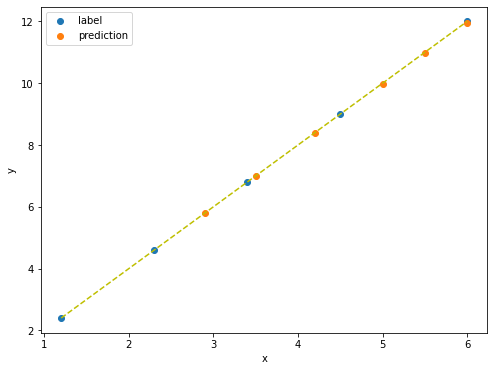

In [ ]:
import matplotlib.pylab as plt

x_test = [1.2, 2.3, 3.4, 4.5, 6.0]
y_test = [2.4, 4.6, 6.8, 9.0, 12.0]

# 그래프 그리기
fig = plt.figure(figsize=(8, 6)) 

plt.scatter(x_test, y_test, label='label')
plt.plot(x_test, y_test, 'y--')

x = [2.9, 3.5, 4.2, 5, 5.5, 6]
pred = model.predict(x)
plt.scatter(x, pred.flatten(), label='prediction')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
#from keras.models import Sequential
#from keras.layers import Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ① 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# ② 모델 구성(생성)
model = Sequential([
    Dense(1, input_shape=(1, ), activation='linear')
    #Dense(1, input_dim=1)
])

# ③ 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 선택
# Mean Absolute Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse',
              metrics=['mae', 'mse'])

# 모델을 표시(시각화)
model.summary()

# ④ 생성된 모델로 훈련 데이터 학습
model.fit(x_train, y_train, epochs=1000)

# ⑤ 테스트 데이터로 성능 평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('정확도:', model.evaluate(x_test, y_test))

print(model.predict([3.5, 5, 5.5, 6]))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 28.1406 - mae: 4.8426 - mse: 28.1406
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 19.5436 - mae: 4.0193 - mse: 19.5436
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 13.5783 - mae: 3.3336 - mse: 13.5783
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.4390 - mae: 2.7625 - mse: 9.4390
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.5667 - mae: 2.2868 - mse: 6.5667
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.5735 - mae: 1.8905 - mse: 4.5735
Epoch 7/

# y = 2x + 1 예측

In [3]:
import tensorflow as tf
import numpy as np

#훈련과 테스트 데이터
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9]) #y = x * 2 + 1

#인공신경망 모델 사용
model = tf.keras.models.Sequential()

#은닉계층 하나 추가 
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

#모델의 패라미터를 지정하고 모델 구조를 생성
#최적화 알고리즘: 확률적 경사 하강법(SGD: Stochastic Gradient Descent)
#손실 함수(loss function): 평균제곱오차(MSE: Mean Square Error)  
model.compile('SGD', 'mse')

#생성된 모델로 훈련 자료로 입력(x[:2])과 출력(y[:2])을 사용하여 학습
#키워드 매개변수 epoch(에퐄): 훈련반복횟수
#키워드 매개변수 verbose: 학습진행사항 표시
model.fit(x[:3], y[:3], epochs=1000, verbose=0)

#테스트 자료의 결과를 출력
print('Targets(정답):', y[3:])

#학습된 모델로 테스트 자료로 결과를 예측(model.predict)하여 출력
print('Predictions(예측):', model.predict(x[3:]).flatten())

Targets(정답): [7 9]
Predictions(예측): [6.999426 8.99907 ]


# 텐서플로로만 구현하는 선형 회귀 예제

In [ ]:
import tensorflow as tf
# ① 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# ② 모델 구성(생성)
# 선형회귀 모델(Wx + b)을 위한 tf.Variable을 선언합니다.
W = tf.Variable(tf.random.normal(shape=[1]))
b = tf.Variable(tf.random.normal(shape=[1]))

@tf.function
def linear_model(x):
    return W*x + b

# ③ 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 최적화를 위한 그라디언트 디센트 옵티마이저를 정의합니다.
optimizer = tf.optimizers.SGD(0.01)

# 손실 함수를 정의합니다. MSE 손실함수 \mean{(y' - y)^2}
@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

# ④ 생성된 모델로 훈련 데이터 학습
# 최적화를 위한 function을 정의합니다.
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        y_pred = linear_model(x) # 모델에 위한 예측 값 계산
        loss = mse_loss(y_pred, y) # MSE 손실 계산
    gradients = tape.gradient(loss, [W, b]) # 미분 자동계산
    optimizer.apply_gradients(zip(gradients, [W, b])) # 최적화 과정에 적용

# 경사하강법을 1000번 수행합니다.
for i in range(1000):
    train_step(x_train, y_train)

# ⑤ 테스트 데이터로 성능 평가
x_test = [3.5, 5, 5.5, 6]

# 테스트 데이터를 이용해 학습된 선형회귀 모델이 데이터의 경향성(y=2x)을 잘 학습했는지 측정합니다.
# 예상되는 참값 : [7, 10, 11, 12]
print(linear_model(x_test).numpy())

[ 7.0003843 10.001415  11.00176   12.002103 ]


* exercise

In [ ]:
import tensorflow as tf

x = tf.ones((2, 2))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)

# 입력 텐서 x에 대한 z의 도함수
dz_dx = t.gradient(z, x)
for i in [0, 1]:
    for j in [0, 1]:
        assert dz_dx[i][j].numpy() == 8.0